<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/Mercari_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np

In [2]:
!apt-get install p7zip
!p7zip -d -f -k /content/drive/MyDrive/mercariPrice/test.tsv.7z
!p7zip -d -f -k /content/drive/MyDrive/mercariPrice/train.tsv.7z
!p7zip -d -f -k /content/drive/MyDrive/mercariPrice/sample_submission.csv.7z

!unzip /content/drive/MyDrive/mercariPrice/sample_submission_stg2.csv.zip
!unzip /content/drive/MyDrive/mercariPrice/test_stg2.tsv.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip is already the newest version (16.02+dfsg-6).
p7zip set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/mercariPrice/                                              1 file, 35617013 bytes (34 MiB)

Extracting archive: /content/drive/MyDrive/mercariPrice/test.tsv.7z
--
Path = /content/drive/MyDrive/mercariPrice/test.tsv.7z
Type = 7z
Physical Size = 35617013
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      8% - test.tsv                10% - 

In [3]:
train = pd.read_csv('/content/train.tsv',header=0,sep='\t',quoting=3)
test = pd.read_csv('/content/test.tsv',header=0,sep='\t',quoting=3)
sample = pd.read_csv('/content/sample_submission.csv',header=0,sep='\t',quoting=3)

In [4]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [5]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"""Breast cancer """"I fight like a girl"""" ring""",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"""25 pcs NEW 7.5""""x12"""" Kraft Bubble Mailers""",1,Other/Office supplies/Shipping Supplies,NaN,1,"""25 pcs NEW 7.5""""x12"""" Kraft Bubble Mailers Li..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [6]:
sample.head()

,"test_id,price"
0,"0,26.738"
1,"1,26.738"
2,"2,26.738"
3,"3,26.738"
4,"4,26.738"


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


In [9]:
train.isna().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

train_id or test_id - the id of the listing

name - the title of the listing. Note that we have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]

item_condition_id - the condition of the items provided by the seller

category_name - category of the listing

brand_name

price - the price that the item was sold for. This is the target variable that you will predict. The unit is USD. This column doesn't exist in test.tsv since that is what you will predict.

shipping - 1 if shipping fee is paid by seller and 0 by buyer

item_description - the full description of the item. Note that we have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage. These removed prices are represented as [rm]

In [10]:
np.unique(train['item_condition_id'],return_counts=True)

(array([1, 2, 3, 4, 5]), array([640549, 375479, 432161,  31962,   2384]))

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


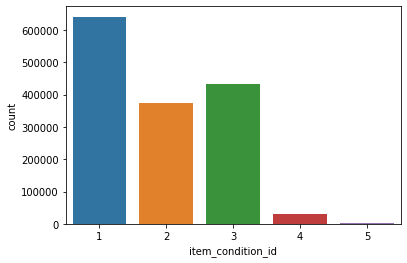

In [12]:
sns.countplot(train['item_condition_id'])
plt.show()

In [13]:
np.unique(train['shipping'],return_counts=True)

(array([0, 1]), array([819435, 663100]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


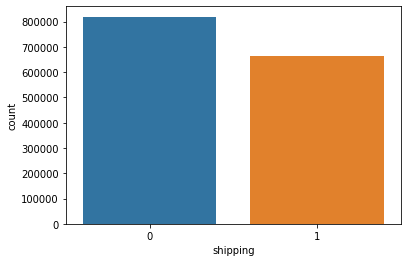

In [14]:
sns.countplot(train['shipping'])
plt.show()

shipping - 1 if shipping fee is paid by seller and 0 by buyer

판매자가 1, 구매자가 0인데 생각과는 다르게 0이 더 많다.

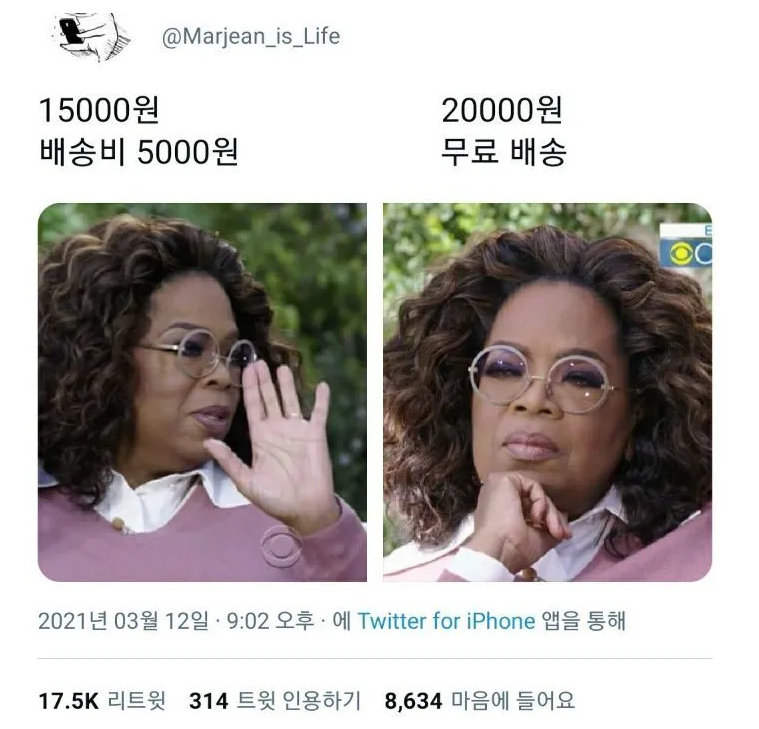


In [15]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
train[train['item_description']=='No description yet']

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
13,13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet
31,31,"New Lularoe OS leggings, stars",1,"Women/Athletic Apparel/Pants, Tights, Leggings",NaN,50.0,1,No description yet
90,90,Jewel holder,2,Home/Storage & Organization/Jewelry Boxes & Or...,Target,7.0,1,No description yet
117,117,Eyeko liquid eyeliner,1,Beauty/Makeup/Eyes,NaN,5.0,1,No description yet
...,...,...,...,...,...,...,...,...
1482430,1482430,Nike Jordan's 5c,3,Kids/Girls 2T-5T/Shoes,Nike,14.0,0,No description yet
1482447,1482447,Wet n Wild Eyelashes,2,Beauty/Makeup/Eyes,Wet n Wild,3.0,1,No description yet
1482470,1482470,Adidas ultra boost,2,Men/Shoes/Athletic,Adidas,9.0,0,No description yet
1482496,1482496,Benefit they're real mascara,1,Beauty/Makeup/Eyes,Benefit,8.0,1,No description yet


In [17]:
count = train['item_description'].apply(lambda x:'NO' if x == 'No description yet' else 'YES')

(array(['NO', 'YES'], dtype=object), array([  82489, 1400046]))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


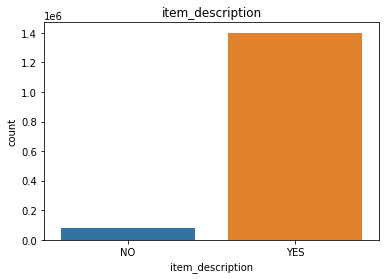

In [18]:
print(np.unique(count,return_counts=True))
sns.countplot(count)
plt.title('item_description')
plt.show()

In [19]:
# sns.countplot(train['brand_name'])
# plt.title('brand_name')
# plt.show()

브랜드가 너무 많아서 한번에 안 보이기에 브랜드면 brand 브랜드가 안 적혔으면 no_brand로 count 변수를 만들어 갯수를 세보자.

In [20]:
count = pd.isna(train['brand_name']).apply(lambda x:'no_brand' if x == False else 'brand')

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
                     ...  
Ten Sixty Sherman        1
St. Croix                1
Kathy Lee                1
Jil Sander               1
For Joseph               1
Name: brand_name, Length: 4809, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


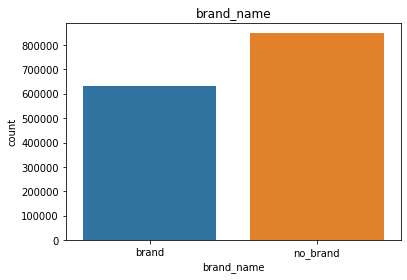

In [21]:
print(train['brand_name'].value_counts())
sns.countplot(count)
plt.title('brand_name')
plt.show()

In [22]:
brand_count = dict(train['brand_name'].value_counts())
n_brand_count = [x for x,y in brand_count.items()][:10]
i_brand_count = [y for x,y in brand_count.items()][:10]

In [23]:
!pip install plotly

In [24]:
import plotly as py
import plotly.express as px

In [25]:
df = pd.DataFrame(list(brand_count.items()),columns=['brand_name', 'count'])

In [26]:
fig = px.bar(df,x='brand_name',y='count')
fig.show()

너무 값이 작아서 안 보이니 log를 취해서 보여준다.

In [27]:
df['count'] = np.log1p(df['count'])

In [28]:
fig = px.bar(df,x='brand_name',y='count')
fig.show()

브랜드 중 가장 많이 배송된 브랜드 10가지만 뽑아내보자.

[['PINK', 54088], ['Nike', 54043], ["Victoria's Secret", 48036], ['LuLaRoe', 31024], ['Apple', 17322], ['FOREVER 21', 15186], ['Nintendo', 15007], ['Lululemon', 14558], ['Michael Kors', 13928], ['American Eagle', 13254]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



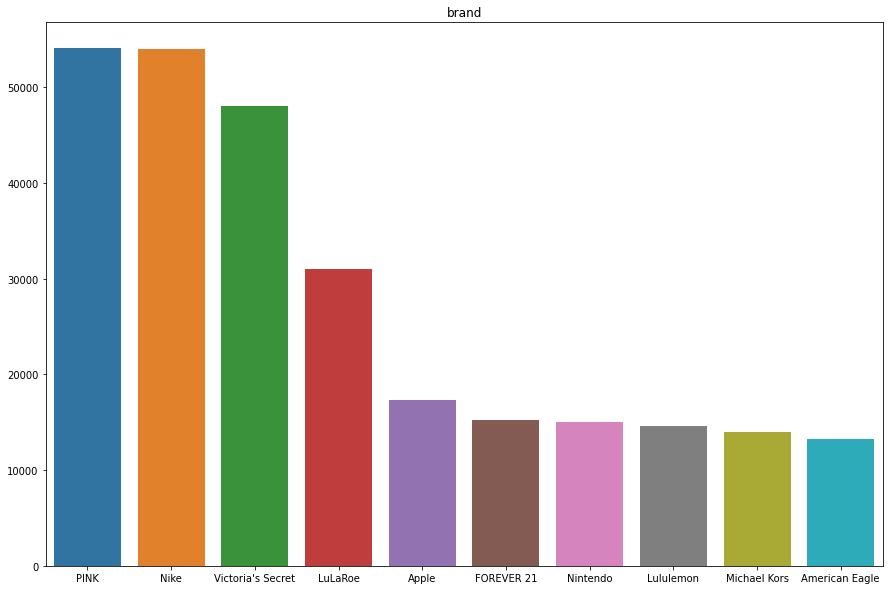

In [29]:
print([[x,y] for x,y in brand_count.items()][:10])
plt.figure(figsize=(15,10))
sns.barplot(n_brand_count,i_brand_count)
plt.title('brand')
plt.show()

In [30]:
from wordcloud import WordCloud
from collections import Counter

barplot으로만 보기 아쉬우니깐 wordcloud를 사용해서 표현해보자.

In [31]:
counts = Counter(train['brand_name'])
tags = counts.most_common(100)[1:]
# 0번이 None 값이라 삭제해주기 위해 1번부터 슬라이스해줬음

In [32]:
wc = WordCloud(background_color='White')

In [33]:
cloud = wc.generate_from_frequencies(dict(tags))

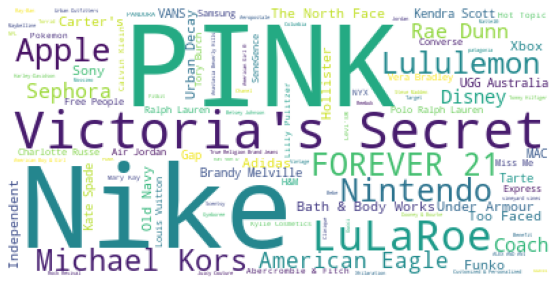

In [34]:
plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [35]:
temp = train['category_name'].str.split('/')
temp

0                                      [Men, Tops, T-shirts]
1          [Electronics, Computers & Tablets, Components ...
2                            [Women, Tops & Blouses, Blouse]
3                     [Home, Home Décor, Home Décor Accents]
4                                [Women, Jewelry, Necklaces]
                                 ...                        
1482530                           [Women, Dresses, Mid-Calf]
1482531                         [Kids, Girls 2T-5T, Dresses]
1482532    [Sports & Outdoors, Exercise, Fitness accessor...
1482533               [Home, Home Décor, Home Décor Accents]
1482534                [Women, Women's Accessories, Wallets]
Name: category_name, Length: 1482535, dtype: object

In [36]:
t = pd.isna(temp)
f_class = []
s_class = []
t_class = []

In [37]:
for i in range(len(temp)):
  if t[i] == True:
    f_class.append(np.nan)
    s_class.append(np.nan)
    t_class.append(np.nan)
  else:
    f_class.append(temp[i][0])
    s_class.append(temp[i][1])
    t_class.append(temp[i][2])

In [38]:
train['f_class'] = f_class
train['s_class'] = s_class
train['t_class'] = t_class
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,f_class,s_class,t_class
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [39]:
train[train['f_class'].isna()]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,f_class,s_class,t_class
122,122,Bundle,3,NaN,NaN,59.0,0,Sizes and info of clothes can be found on thei...,NaN,NaN,NaN
155,155,3 Nora Roberts Books,3,NaN,NaN,10.0,1,For aferg16.,NaN,NaN,NaN
258,258,ACER Laptop,5,NaN,NaN,14.0,0,"Powers on, no screen display, no external dama...",NaN,NaN,NaN
984,984,AUTHENTIC BRWN MICHAEL KORS MAKEUP STAIN,4,NaN,Michael Kors,18.0,0,No description yet,NaN,NaN,NaN
1185,1185,Teenage Mutant Ninja Turtle Van/ Extras,3,NaN,Nickelodeon,9.0,0,"Teenage Mutant Ninja Turtle Van, April O'Neil ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1481249,1481249,Only For Erin. Do Not Buy,3,NaN,NaN,31.0,0,No description yet,NaN,NaN,NaN
1481750,1481750,American Eagle Jeggings,2,NaN,American Eagle,17.0,0,Worn a couple of time Size 4,NaN,NaN,NaN
1482252,1482252,Bundle For All Honey :),3,NaN,NaN,40.0,0,No description yet,NaN,NaN,NaN
1482443,1482443,HOLD 14g Purple Prong Nipple Bars Rings,1,NaN,NaN,22.0,1,14g Purple Prong Set Nipple Bars Rings [surgic...,NaN,NaN,NaN


In [40]:
np.unique(train['name'],return_counts=True)

(array(['! 3 girls t shirts', '! 4 old baseball cards',
        "! ALPINESTAR MEN'S TEE SHIRT!", ...,
        '（on sale）Xmas gift 2/set buddha keychain',
        '，Carolina Panthers #88 Greg Olsen jersey',
        '：）iPhone 6/6s RoseGold Mirror case'], dtype=object),
 array([1, 1, 1, ..., 1, 1, 1]))

In [41]:
train.drop(['category_name'],axis=1,inplace=True)

In [42]:
np.unique(train['f_class'].duplicated(),return_counts=True)

(array([False,  True]), array([     11, 1482524]))

In [43]:
train['f_class'].value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Name: f_class, dtype: int64

In [44]:
df = pd.DataFrame(train['f_class'])
df = pd.DataFrame(df.value_counts().items(),columns=['f_class','count'])
df['f_class'] = df['f_class'].apply(lambda x: list(x))
df

,f_class,count
0,[Women],664385
1,[Beauty],207828
2,[Kids],171689
3,[Electronics],122690
4,[Men],93680
5,[Home],67871
6,[Vintage & Collectibles],46530
7,[Other],45351
8,[Handmade],30842
9,[Sports & Outdoors],25342


In [45]:
fig = px.pie(df, values='count',names='f_class')
fig.show()

In [46]:
train['s_class'].value_counts()

Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: s_class, Length: 113, dtype: int64

In [47]:
train['t_class'].value_counts()

Pants, Tights, Leggings    60177
Other                      50224
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
Videogame                      1
Bathroom Shelves               1
Child Friendly                 1
Bathroom Furniture             1
Pad                            1
Name: t_class, Length: 870, dtype: int64

In [48]:
sorted(dict(train['t_class'].value_counts()))

['100 Years or Older',
 '50 To 75 Years',
 '75 To 100 Years',
 'A-Line',
 'Above Knee, Mini',
 'Accessories',
 'Accessory',
 'Aceo',
 'Action Figure',
 'Action Figures & Statues',
 'Action, Adventure',
 'Activity Centers & Entertainers',
 'Advertisement',
 'Afghan',
 'Air Conditioners',
 'Air Fresheners',
 'Air Purifiers',
 'All Other Sports',
 'Amplifiers & Effects',
 'Animal',
 'Animals',
 'Animation',
 'Apron',
 'Area Rugs & Pads',
 'Art',
 'Art Doll',
 'Artist Bears',
 'Arts & Crafts',
 'Arts & Photography',
 'Asymmetrical',
 'Asymmetrical Hem',
 'Athletic',
 'Athletic Apparel',
 'Athletic Training',
 'Automotive Enthusiast Merchandise',
 'Baby',
 'Baby & Child Care',
 'Baby & Toddler Toys',
 'Baby Gyms & Playmats',
 'Baby Seats',
 'Backpack',
 'Backpack Style',
 'Backpacks & Carriers',
 'Backpacks, Bags & Briefcases',
 'Badminton',
 'Baggy, Loose',
 'Bags & Cases',
 'Bags and Purses',
 'Baguette',
 'Bakeware',
 'Band & Orchestra',
 'Baseball & Softball',
 'Basic Supplies',
 'Baske

In [49]:
np.unique(train.duplicated(),return_counts=True)

(array([False]), array([1482535]))

train에 중복이 있는지 확인해줬다. 전부 False이기에 중복 값 x

In [50]:
train.drop_duplicates()
# 혹시 모르기에 중복값 drop 시켰음

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,f_class,s_class,t_class
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,NaN,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [51]:
from nltk.tokenize import word_tokenize

In [52]:
# for i in range(len(train)):
#   print(word_tokenize(train['item_description'][i]))

In [52]:
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.corpus import stopwords  
nltk.download('stopwords')
tokenizer = RegexpTokenizer("[\w]+")
train['item_description'] = train['item_description'].fillna('No description yet')
print(train.isna().sum())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
train_id                  0
name                      0
item_condition_id         0
brand_name           632682
price                     0
shipping                  0
item_description          0
f_class                6327
s_class                6327
t_class                6327
dtype: int64


In [53]:
stopword = stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [54]:
stopword = stopwords.words('english')
train['item_description'] = train['item_description'].apply(lambda x:tokenizer.tokenize(x.lower()))

In [55]:
# import re
# item = []
# for i in train['item_description']:
#   item.append(re.sub('[0-9]+','',' '.join(i)))
# item

In [57]:
import re
train['item_description'] = train['item_description'].apply(lambda x : re.sub('[0-9]+','',' '.join(x)))

NameError: ignored

In [58]:
train

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,f_class,s_class,t_class
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,no description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,this keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NaN,35.0,1,new with tags leather horses retail for rm eac...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NaN,44.0,0,complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,20.0,1,lace says size small but fits medium perfectly...,Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Disney,14.0,0,little mermaid handmade dress never worn size t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,NaN,12.0,0,used once or twice still in great shape,Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,NaN,45.0,1,there is of each one that you see so red or...,Home,Home Décor,Home Décor Accents


In [61]:
# train['item_description'] = [(train['item_description'][i]).split(' ') for i in range(len(train))]

In [ ]:
train['item_description']= [word_tokenize(train['item_description'][i]) for i in range(len(train))]

In [62]:
train

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,f_class,s_class,t_class
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,"[no, description, yet]",Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,"[this, keyboard, is, in, great, condition, and...",Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,"[adorable, top, with, a, hint, of, lace, and, ...",Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NaN,35.0,1,"[new, with, tags, leather, horses, retail, for...",Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NaN,44.0,0,"[complete, with, certificate, of, authenticity]",Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,20.0,1,"[lace, says, size, small, but, fits, medium, p...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Disney,14.0,0,"[little, mermaid, handmade, dress, never, worn...",Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,NaN,12.0,0,"[used, once, or, twice, still, in, great, shape]",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,NaN,45.0,1,"[there, is, , of, each, one, that, you, see, s...",Home,Home Décor,Home Décor Accents


그냥 split으로 나누니깐 공백이 생겨버림

In [63]:
item = []
for i in train['item_description']:
  t = []
  for j in i:
    if j not in stopword:
      t.append(j)
  item.append(t)
train['item_description'] = item

In [64]:
train

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,f_class,s_class,t_class
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,"[description, yet]",Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,"[keyboard, great, condition, works, like, came...",Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,"[adorable, top, hint, lace, key, hole, back, p...",Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NaN,35.0,1,"[new, tags, leather, horses, retail, rm, stand...",Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NaN,44.0,0,"[complete, certificate, authenticity]",Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,20.0,1,"[lace, says, size, small, fits, medium, perfec...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Disney,14.0,0,"[little, mermaid, handmade, dress, never, worn...",Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,NaN,12.0,0,"[used, twice, still, great, shape]",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,NaN,45.0,1,"[, one, see, , red, , orange, , big, red, oran...",Home,Home Décor,Home Décor Accents


불용어 삭제